In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, recall_score, precision_score, classification_report, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

import xgboost as xgb
# from xgboost import XGBClassifier

from scipy.stats import boxcox

import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

from wordcloud import WordCloud

from joblib import dump, load
import pickle

import string
import re
import time

# pip install pandas_profiling
# from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing dataset

data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1")
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
# column names

data.columns = ["sentiment", "time", "date", "query", "username", "text"]
data.head()

,sentiment,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
data.shape

(1599999, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   time       1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   query      1599999 non-null  object
 4   username   1599999 non-null  object
 5   text       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
data.isnull().sum()

sentiment    0
time         0
date         0
query        0
username     0
text         0
dtype: int64

In [7]:
data['sentiment'].value_counts()

4    800000
0    799999
Name: sentiment, dtype: int64

<AxesSubplot:>

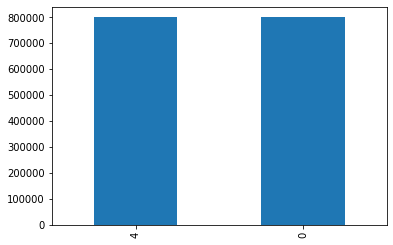

In [8]:
data['sentiment'].value_counts().plot.bar()

In [9]:
data = data[['text', 'sentiment']]
data.head()

,text,sentiment
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [10]:
# convert positive 1 and negative 0
data['sentiment'] = data['sentiment'].apply(lambda x : 1 if x == 4 else x)

In [11]:
data['sentiment'].value_counts()

1    800000
0    799999
Name: sentiment, dtype: int64

In [12]:
data.head()

,text,sentiment
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [13]:
text, sentiment = list(data['text']), list(data['sentiment'])

In [14]:
print(text[:5])

["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds', 'my whole body feels itchy and like its on fire ', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ", '@Kwesidei not the whole crew ']


In [21]:
#check if all values are str
all(isinstance(x, str) for x in text)

True

In [16]:
#data preprocessing

#stop = stopwords.words('english')

In [116]:
#defined method with preprocessing functions

def preprocess(textdata):
    
    #defining dictionary containing all emojis with their meanings
    emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
             ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
             ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\\\': 'annoyed', 
             ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
             '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
             '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
             ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
    
    stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                   'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
                   'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
                   'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
                   'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                   'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                   'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                   'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
                   'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
                   's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
                   't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                   'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
                   'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
                   'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
                   'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
                   "youve", 'your', 'yours', 'yourself', 'yourselves']
    
    processedText = []
    
  
    # Defining regex patterns.\n",
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
 
    userPattern = '@[^\\s]+'

    #alphaPattern      = "[^a-zA-Z]
    alphaPattern      = "[^a-zA-Z]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        #replace all URLs with 'URL'
        tweet = re.sub(urlPattern, ' URL', tweet)
        
        #Replace all emojis
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
            
        #Replace @username to USER:
        tweet = re.sub(userPattern, ' USER', tweet)
        
        # Replace all non alphabets
        tweet = re.sub(alphaPattern, " ", tweet)
        
        # Replace 3 or more consecutive letters by 2 Letter
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        
        # Removing punctuations
        all_char_list = []
        all_char_list = [char for char in tweet if char not in string.punctuation]
        tweet = ''.join(all_char_list)
        
        #removing stopwords
        tweetwords = ''
        for word in tweet.split():
            if word not in (stopwordlist):
                if len(word)>1:
                    tweetwords += (word+ ' ')
        
        processedText.append(tweetwords)
        
    return processedText
            
            
            

In [117]:
#calc time taken

t = time.time()
preprocessedtext = preprocess(text)
print('Text processing complete')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text processing complete
Time Taken: 90 seconds


In [118]:
# defining method to return 2nd parameter for lemmatization that is POS tag

def get_wordnet_pos_tag(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    if tag.startswith("V"):
        return wordnet.VERB
    if tag.startswith("N"):
        return wordnet.NOUN
    if tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

In [119]:
# create a method to perform lemmatization with POS tags identified via a pos_tag method

def lemmatize_process(preprocessedtext):
    lemma = WordNetLemmatizer()
    
    finalprocessedtext = []
    for tweet in preprocessedtext:
        text_pos = pos_tag(word_tokenize(tweet))
        words = [x[0] for x in text_pos]
        pos = [x[1] for x in text_pos]
        tweet_lemma = " ".join([lemma.lemmatize(a,get_wordnet_pos_tag(b)) for a,b in zip(words,pos)])
        finalprocessedtext.append(tweet_lemma)
    return finalprocessedtext


In [121]:
# applying entire text stored in list "text" for preprocessing and calc time taken to perform operation

t = time.time()
processedtext = lemmatize_process(preprocessedtext)
print('Text Lemmatization complete')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Lemmatization complete
Time Taken: 1333 seconds


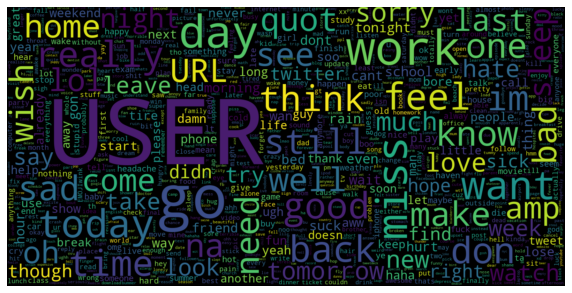

In [122]:
#Data Analysis

data_neg = processedtext[:800000]
all_negwords = ' '.join(data_neg)
wordcloud = WordCloud(max_words = 1000, width = 1600, height = 800,
                     collocations = False).generate(all_negwords)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

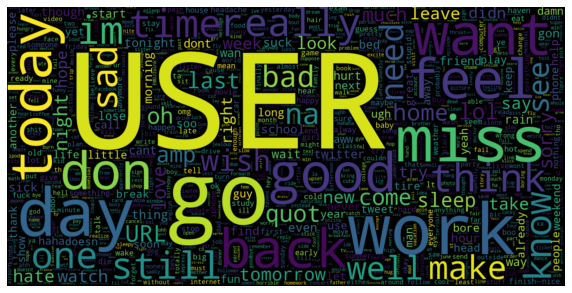

In [123]:
#Data Analysis

data_pos = processedtext[800000:]
all_poswords = ' '.join(data_pos)
wordcloud = WordCloud(max_words = 1000, width = 1600, height = 800,
                     collocations = False).generate(all_negwords)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [124]:
token_wspace = tokenize.WhitespaceTokenizer()

def mostFrequentWords(tweets, quantity):
    all_words = ' '.join(tweets)
    all_tokens = token_wspace.tokenize(all_words)
    freq_dist = nltk.FreqDist(all_tokens)
    df_frequency = pd.DataFrame({"Word":list(freq_dist.keys()), "Frequency":list(freq_dist.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = "blue")
    ax.set(ylabel = "Count")
    plt.xticks(rotation = 'vertical')
    plt.show()
                                 

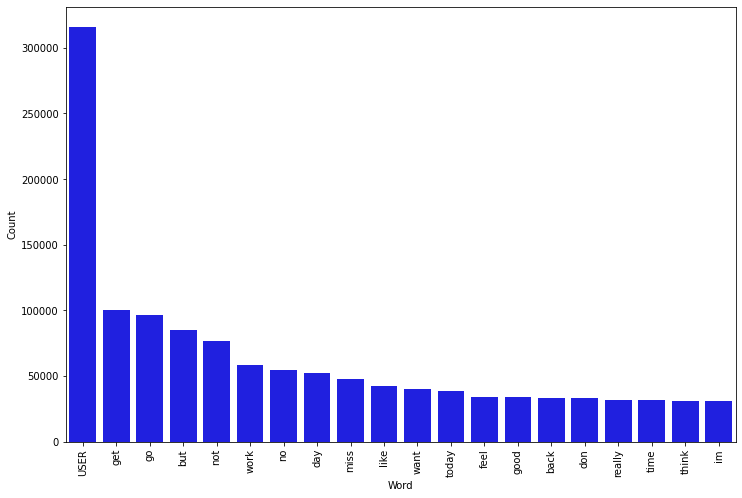

In [125]:
# negative

mostFrequentWords(processedtext[:800000], 20)

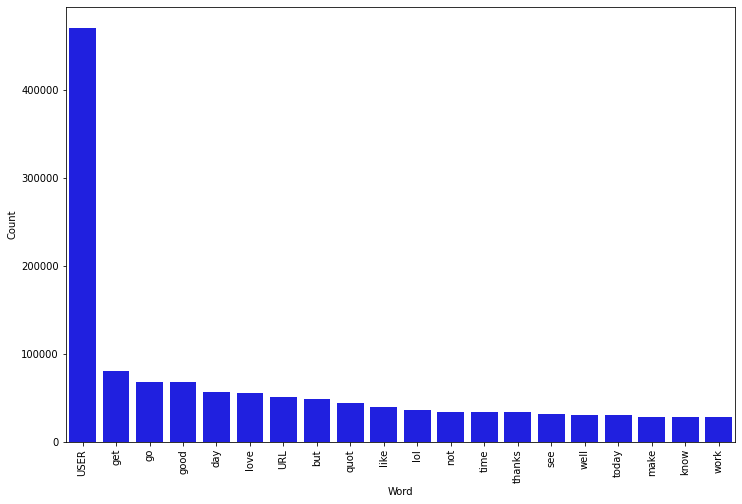

In [126]:
# positive 

mostFrequentWords(processedtext[800000:], 20)

In [128]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.05, random_state = 0)

print('Data split done...')

Data split done...


In [129]:
# TF-IDF Vectorizer
# Fitting TFIDF vectorizer on the train dataset

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('Vectoriser fitted')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted
No. of feature_words:  500000


In [130]:
# transforming the dataset
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)
print('Data Transformed')

Data Transformed


In [135]:
# model evaluation method

def model_Evaluate(model):
    
    #Predict values for test dataset
    y_pred = model.predict(X_test)
    #print evaluation metric
    print(classification_report(y_test, y_pred))
    
    #compute and plot confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues', fmt = '',
               xticklabels = categories, yticklabels = categories)
    
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values", fontdict = {'size':14}, labelpad = 10)
    plt.title("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
    plt.title("ROC CURVE")
    #Area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area= %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return y_pred
    
    

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     39986
           1       0.79      0.81      0.80     40014

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



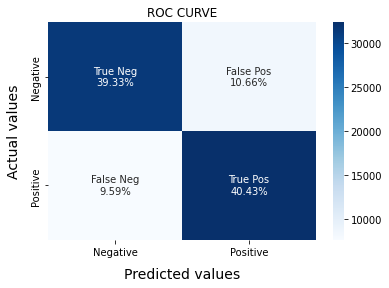

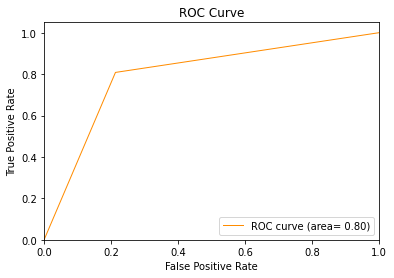

array([1, 1, 0, ..., 1, 1, 1])

In [136]:
# create a linear svc model

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     39986
           1       0.79      0.80      0.80     40014

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.79      0.79      0.79     80000



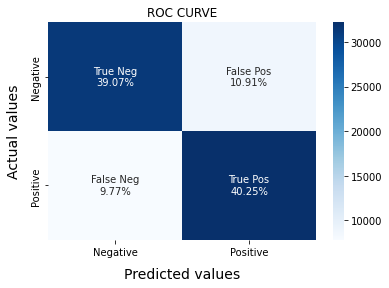

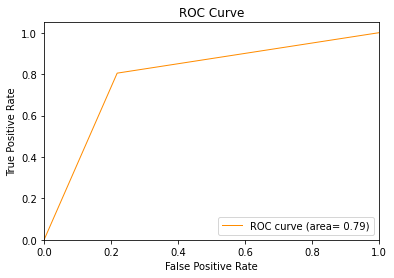

array([1, 1, 0, ..., 1, 1, 0])

In [137]:
# create bernoulli naive bayes model

BNBmodel = BernoulliNB(alpha=2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     39986
           1       0.81      0.82      0.81     40014

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



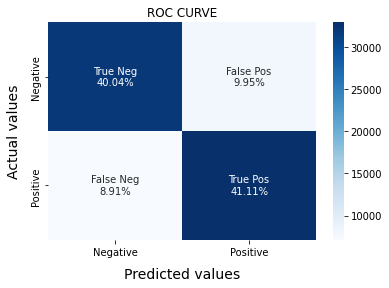

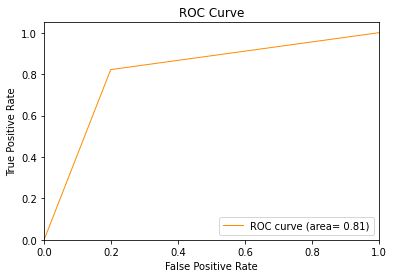

In [138]:
# logistic regression model
LRmodel = LogisticRegression(C = 1, max_iter = 1000, n_jobs = -1)
LRmodel.fit(X_train, y_train)
y_test_pred = model_Evaluate(LRmodel)

In [139]:
# print pos and neg sentiment on test data based on logisitc regression model

print("Positive Sentiment Percentage : {}%".format(round(np.count_nonzero(y_test_pred == 1)/len(y_test_pred)*100,2)))

print("Negative Sentiment Percentage : {}%".format(round(np.count_nonzero(y_test_pred == 0)/len(y_test_pred)*100,2)))

Positive Sentiment Percentage : 51.05%
Negative Sentiment Percentage : 48.95%


In [143]:
# SAVE MODEL

file = open('/Users/hlabs/Desktop/hoop/chatdash/models/vectoriser.pickle', 'wb')
pickle.dump(vectoriser, file)
file.close()

file = open('/Users/hlabs/Desktop/hoop/chatdash/models/Sentiment-LR.pickle', 'wb')
pickle.dump(LRmodel, file)
file.close()


In [144]:
#using the model
def load_models():
    
    #Load the vectoriser
    file = open('/Users/hlabs/Desktop/hoop/chatdash/models/vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    
    #Load the LR Model
    file = open('/Users/hlabs/Desktop/hoop/chatdash/models/Sentiment-LR.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    finaldata = []
    
    textdata = vectoriser.transform(lemmatize_process(preprocess(text)))
    sentiment = model.predict(textdata)
    
    #print(model.classes_)
    sentiment_prob = model.predict_proba(textdata)
    
    for index,tweet in enumerate(text):
        if sentiment[index] == 1:
            sentiment_probFinal = sentiment_prob[index][1]
        else:
            sentiment_probFinal = sentiment_prob[index][0]
        
        sentiment_probFinal2 = "{}%".format(round(sentiment_probFinal*100, 2))
        finaldata.append((tweet, sentiment[index], sentiment_probFinal2))
        
    df = pd.DataFrame(finaldata, columns = ['tweet', 'sentiment', 'Probability(Confidence Level)'])
    df = df.replace([0,1], ["Negative", "Positive"])
    return df

In [145]:
# text to classify
text = ["I hate twitter",
       "I do not like the movie",
       "Mr. Stark, I don't feel so good",
       "May the force be with you.",
       "I read the book, the content is not good",
       "This is a new beginning for us"]

In [146]:
vectoriser, LRmodel = load_models()
df = predict(vectoriser, LRmodel, text)
df

,tweet,sentiment,Probability(Confidence Level)
0,I hate twitter,Negative,93.21%
1,I do not like the movie,Negative,80.73%
2,"Mr. Stark, I don't feel so good",Negative,68.76%
3,May the force be with you.,Positive,66.8%
4,"I read the book, the content is not good",Negative,67.31%
5,This is a new beginning for us,Positive,79.58%


In [147]:
# excel upload

data = pd.read_csv("/Users/hlabs/Desktop/hoop/chatdash/testdata.csv", encoding = "ISO-8859-1")
data.head()

,url,date,text
0,https://twitter.com/EcoLisa_/status/9022754290...,Mon Aug 28 21:03:20 2017,Here's how you can help victims of #HurricaneH...
1,https://twitter.com/RedefiningDecor/status/903...,Thu Aug 31 15:43:15 2017,RT @tripgabriel: This is a very gripping graph...
2,https://twitter.com/BestofY00/status/903281998...,Thu Aug 31 15:43:05 2017,RT @tripgabriel: This is a very gripping graph...
3,https://twitter.com/Deborah9111966/status/9032...,Thu Aug 31 15:43:01 2017,RT @tripgabriel: This is a very gripping graph...
4,https://twitter.com/kirkbocchi/status/90328194...,Thu Aug 31 15:42:53 2017,RT @tripgabriel: This is a very gripping graph...


In [148]:
data.shape

(15428, 3)

In [149]:
text = list(data['text'])

In [150]:
def predict_Excel(vectoriser, model, text):
    finaldata = []
    
    textdata = vectoriser.transform(lemmatize_process(preprocess(text)))
    sentiment = model.predict(textdata)
    
    # print(model.classes_)
    sentiment_prob = model.predict_proba(textdata)
    
    for index, tweet in enumerate(text):
        sentiment_probFinal = sentiment_prob[index][0]
        
        sentiment_probFinal2 = "{}%".format(round(sentiment_probFinal*100,2))
        finaldata.append((tweet, sentiment[index], sentiment_probFinal2))
        
    #Convert the list into a pandas df
    
    df = pd.DataFrame(finaldata, columns = ['tweet', 'sentiment', 'Severity'])
    df = df.replace([0,1], ["Negative", "Positive"])
    return df

In [151]:
vectoriser, LRmodel = load_models()
df = predict_Excel(vectoriser, LRmodel, text)

In [152]:
df.sort_values(by=['Severity'], ascending=False, inplace=True)
df

,tweet,sentiment,Severity
6888,When the storm comes it affects us all...no ex...,Negative,99.6%
2009,This breaks my heart. I wish I could do more t...,Negative,99.53%
18,This is so sad. Thousands Cried for Help as Ho...,Negative,99.3%
9121,It's Sad That Some Hispanics In Houston Have T...,Negative,99.18%
9794,Sad and scary situation in Houston https://t.c...,Negative,99.12%
...,...,...,...
9538,RT @PRyan: Thank you @JJWatt. You make Wiscons...,Positive,0.98%
9558,RT @PRyan: Thank you @JJWatt. You make Wiscons...,Positive,0.98%
9533,RT @PRyan: Thank you @JJWatt. You make Wiscons...,Positive,0.98%
1477,Good morning #SPNFamily I'm so proud of us Ke...,Positive,0.91%


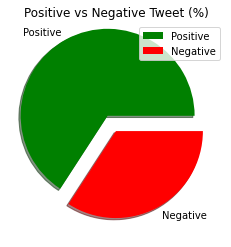

In [154]:
positive = round(np.count_nonzero(df['sentiment'] == "Positive")/len(df['sentiment'])*100,2)
negative = round(np.count_nonzero(df['sentiment'] == "Negative")/len(df['sentiment'])*100,2)

labels = ['Positive', 'Negative']
values = np.array([positive,negative])
myexplode = [0.2,0]
mycolours = ["green", "red"]

fig,ax = plt.subplots()
ax.pie(values, labels = labels, explode = myexplode, shadow = True, colors = mycolours)
ax.legend()
ax.set_title("Positive vs Negative Tweet (%)")
fig.show()

In [155]:
filename = 'Final.csv'
df.to_csv(filename, index=False)
print('Saved file: ' + filename)

Saved file: Final.csv
